# **Utilizando Python na resolução de problemas de Geometria Analítica** 

_Este Notebook acessará conteúdos abordados no **e-book** [TAIL — Introdução à Matemática para Inteligência Artificial](https://www.overleaf.com/read/gtspgphgvstz), seja livre para revisitá-lo quando necessário._

### Importar biblioteca

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_style("darkgrid")
sns.set_palette('cubehelix')
%matplotlib inline

### Espaços e dimensões no Python

_(e-book: 2.1 Sistema de coordenadas cartesianas, p. 9)_

Neste tópico vamos abordar os conceitos de dimensões e espaços matemáticos na linguagem Python, para isso, iremos utilizar de várias bibliotecas com funções gráficas interessantes, auxiliando na visualização destes conceitos.

#### Espaço unidimensional
_(e-book: 2.1.1 Reta dos reais, p. 9)_

Mais comumente referido como a reta dos reais, este espaço compreende um conjunto de números reais na primeira dimensão, no Python, estes números são representados como um tipo de objeto numérico chamado o tipo _float_.

Apesar desta reta ser infinita, no python ela é limitada por motivos de capacidade computacional, porém na grande maioria dos casos isso não será um problema.

In [ ]:
import sys
print('valor tipo float máximo: ', sys.float_info.max)
print('valor tipo float mínimo: ', sys.float_info.min)

valor tipo float máximo:  1.7976931348623157e+308
valor tipo float mínimo:  2.2250738585072014e-308


Neste sentido, é possível dizer que a reta dos reais no python é uma reta que liga estes dois valores reais, com 16 casas decimais de precisão.

#### Espaço bidimensional

_(e-book: 2.1.2 Espaço bidimensional, p. 9)_

Adicionando uma dimensão, adiciona-se também uma reta real linearmente independente à reta dos reais anterior, agora, cada eixo ortogonal nos dará informações espaciais chamadas de **coordenadas cartesianas**, definindo assim um ponto no espaço 2D

AxesSubplot(0.125,0.125;0.775x0.755)


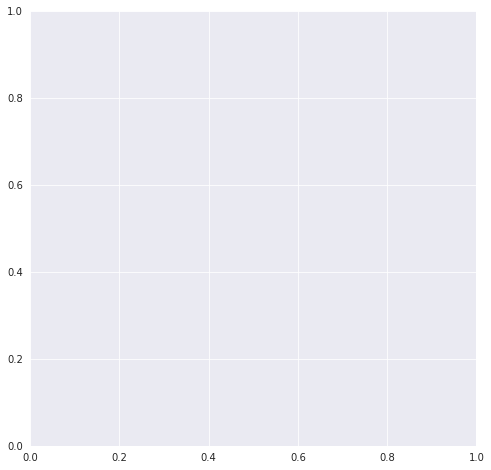

In [ ]:
print(plt.subplots(figsize = (8, 8))[1])

Este ambiente criado é justamente o espaço bidimensional onde iremos trabalhar, podemos evidenciar os quatro quadrantes com cores

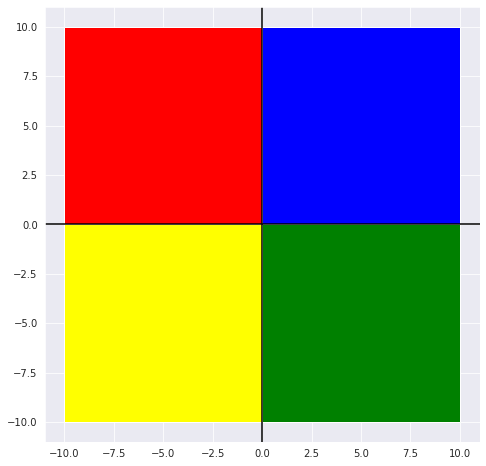

In [ ]:
plt.subplots(figsize = (8, 8))                                                   #Altera o tamanho do gráfico

rectangle1 = plt.Rectangle((0, 0), 10, 10, fc = 'blue')                            # primeiro quadrante: (+,+)
rectangle2 = plt.Rectangle((-10, 0), 10, 10, fc = 'red')                           # segundo quadrante:  (-,+)
rectangle3 = plt.Rectangle((-10, -10), 10, 10, fc = 'yellow')                      # terceiro quadrante: (-,-)
rectangle4 = plt.Rectangle((0, -10), 10, 10, fc = 'green')                         # quarto quadrante:   (+,-)

plt.gca().add_patch(rectangle1)
plt.gca().add_patch(rectangle2)
plt.gca().add_patch(rectangle3)
plt.gca().add_patch(rectangle4)
plt.axis('scaled')

eixo1 = np.arange(-20, 20, 1)                                                      # Destacando os eixos x e y
eixo2 = np.zeros((40, 1))
plt.plot(eixo1, eixo2, 'k')
plt.plot(eixo2, eixo1, 'k')

plt.show()

#### Espaço tridimensional

_(e-book: 2.1.3 Espaço tridimensional, p. 10)_

Da mesma forma que o espaço bidimensional é criado ao adicionar uma reta ortogonal independente ao espaço unidimensional, se nós adicionarmos dois planos que cortam ortogonalmente o espaço 2d, nós criaremos o espaço tridimensional. Partindo de 3 eixos linearmente independentes, **X**, **Y** e **Z**, agora precisamos de 3 coordenadas cartesianas para localizar um ponto no espaço 3D

Com a terceira dimensão, adiciona-se também a complexidade tanto da programação, como da nossa compreesão visual, pois geralmente visualizamos os espaços 3D numa superfície 2D, como em um papel ou na tela de um computador, dito isto, a análise gráfica ainda é intuitiva.

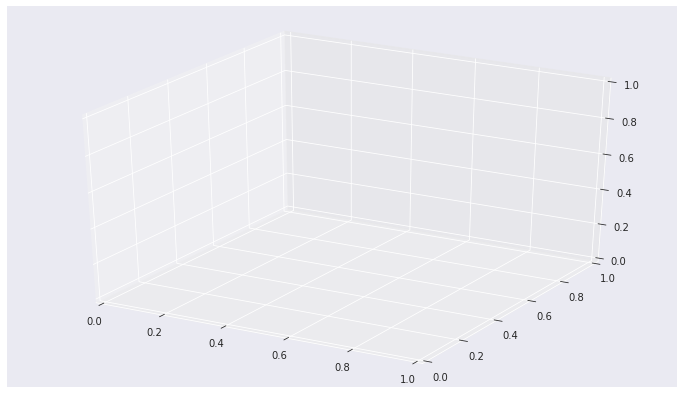

In [ ]:
#Criando nosso espaço tridimensional
fig = plt.figure(figsize = (12, 7))
ax = fig.gca(projection='3d')

Assim como no plano cartesiano existem 4 quadrantes, no espaço tridimensional, existem 8 regiões criadas a partir dos planos **yz, xz,** e **xy** (X, Y e Z iguais a zero, respectivamente) em que cada região possui um valor positivo ou negativo para coordenada.

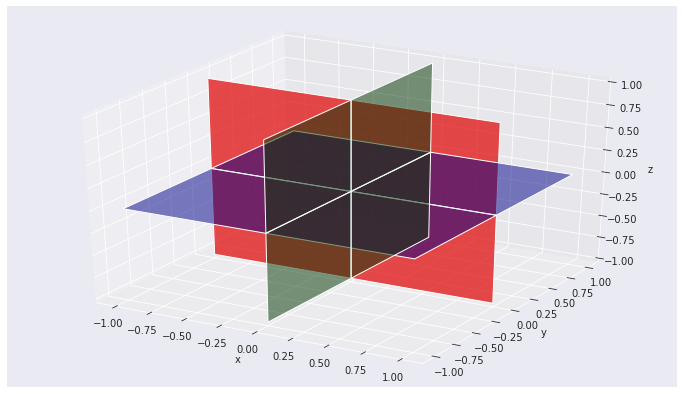

In [ ]:
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')

y, z = np.meshgrid(range(-1,2), range(-1,2))
x = y * 0

y2, x2 = np.meshgrid(range(-1,2), range(-1,2))
z2 = y2 * 0

x3, z3 = np.meshgrid(range(-1,2), range(-1,2))
y3 = z3 * 0

#Declarando e plotando os 3 planos

ax.plot_surface(x, y, z, color = 'green', alpha = 0.5)

ax.plot_surface(x2, y2, z2, color = 'blue', alpha = 0.5)

ax.plot_surface(x3, y3, z3, color = 'red', alpha = 0.7)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

### Calculando distâncias

_(e-book: 2.4 Distância, p. 12)_

Também é possível usar numpy para calcular diferentes tipos distâncias, sendo a principal delas a euclidiana, muito importante em diversas áreas da inteligência artificial, como a avaliação de modelos e em algoritmos KNN.


---

Vamos ver primeiramente como calcular a distância euclidiana, que é a menor distância entre dois pontos em um espaço de n-dimensões _(e-book: 2.4.1 Distancia euclidiana, p. 12)_:

In [ ]:
#Para calcular a distância entre dois pontos, primeiramente é necessário declará-los com arrays
#Nesse primeiro exemplo, vamos usar dois pontos simples em um plano cartesiano

ponto_a = np.array([0, 0]) 
ponto_b = np.array([1, 1])
#Pontos declarados usando a função array de numpy

#Para calcular a distância entre eles, é só usar a função linalg.norm de numpy, passando como parâmetro a subtração dos dois pontos (em qualquer ordem)
distancia = np.linalg.norm(ponto_b - ponto_a)

print('distancia:', distancia)

#E essa função funciona para pontos em espaços de qualquer dimensão

ponto_c = np.array([0]) 
ponto_d = np.array([7])

distancia1d = np.linalg.norm(ponto_c - ponto_d)
#Distância em um espaço unidimensional
print('distancia 1d:',distancia1d)

ponto_e = np.array([1, 2, 3]) 
ponto_f = np.array([4, 5, 6])

distancia3d = np.linalg.norm(ponto_e - ponto_f)
#Distância em um espaço tridimensional
print('distancia 3d:',distancia3d)

ponto_g = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) 
ponto_h = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0 , 0])

distancia10d = np.linalg.norm(ponto_g - ponto_h)
#Até em um espaços com 10 dimensões
print('distancia 10d:',distancia10d)

distancia: 1.4142135623730951
distancia 1d: 7.0
distancia 3d: 5.196152422706632
distancia 10d: 19.621416870348583


Outra distância que também podemos calcular é a distância manhattan _(e-book: 2.4.2 Distancia euclidiana, p. 13)_:

In [ ]:
#Primeiro temos que declarar os pontos

ponto_m = np.array([0, 0])
ponto_n = np.array([3, 5])

#Com os pontos declarados, para calcular a distância temos que usar duas funções de numpy:
#abs, que passamos como paramêtro a subtração de nossos pontos em qualquer ordem e ela retorna o valor absoluto
#sum, que soma todos os valores do array, resultando na distância desejada
distman = np.sum(np.abs(ponto_m - ponto_n))
print('Distância Manhattan 2D: ',distman)
#Assim como na euclidiana, por esse método, é possível calcular a distância manhattan para pontos em espaços de qualquer dimensão

ponto_man = np.array([1])
ponto_hat = np.array([-8])
#Espaço unidimensional
disthattan = np.sum(np.abs(ponto_man - ponto_hat))
print('Distância Manhattan 1D: ',disthattan)

ponto_t = np.array([1, 0, 5, 9, 2])
ponto_an = np.array([4, 2, -1, 7, -14])
#Espaço de 5 dimensões
d8 = np.sum(np.abs(ponto_t - ponto_an))
print('Distância Manhattan 5D: ',d8)

Distância Manhattan 2D:  8
Distância Manhattan 1D:  9
Distância Manhattan 5D:  29


### Criando uma reta

Neste exemplo iremos criar uma reta para separar visualmente um conjunto de dados.

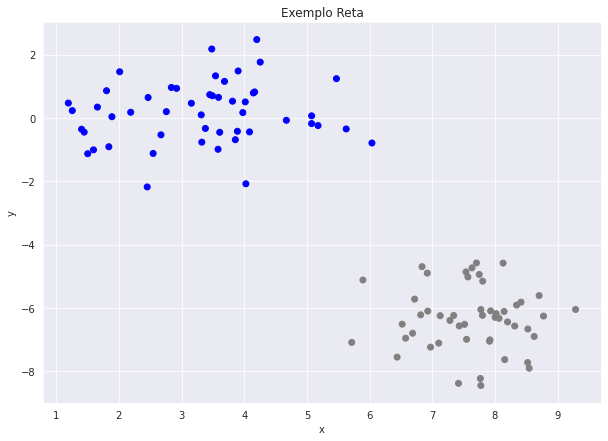

In [ ]:
from sklearn.datasets import make_blobs

x, y = make_blobs(n_features=2, centers=2, random_state = 18)                      #cria 2 conjuntos de dados

cores=[]                                                                           #colorindo cada conjunto
for i in y:
  if i == 0:
    cores.append('blue')
  else:
    cores.append('gray')

fig, ax = plt.subplots(figsize = (10, 7))

np.sort(x[:,1])

ax.scatter(x[:,0], x[:,1], color = cores)
ax.set_title('Exemplo Reta')
ax.set_xlabel("x")
ax.set_ylabel('y')

plt.show()
# 2 pontos que queremos (2, -8) e (8, 0)

Visualmente, podemos perceber que os pontos (2, -8) e (8, 0) são ideais para dividir estes dados, vamos identificá-los a seguir,

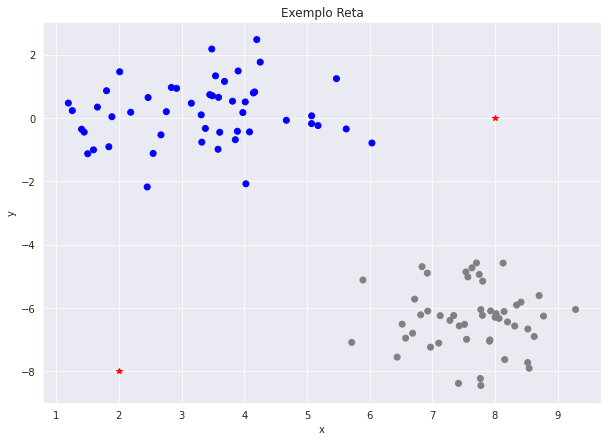

In [ ]:
ax.plot(2, -8, 'r*')
ax.plot(8, 0, 'r*')

fig

Agora vamos a partir destes pontos, encontrar a equação da reta ao resolver um sistema de equações. Este cálculo é trivial e pode ser feito manualmente, porém existe a função _solve_ da biblioteca _Sympy_ capaz de fazer isso mais rapidamente.

In [ ]:
from sympy import solve, Symbol
# y = a * x + b
P1, P2 = (2., -8.), (8., 0.)
a = Symbol('a')
b = Symbol('b')

solve([a * P1[0] + b - P1[1],     #Equação da reta para P1
       a * P2[0] + b - P2[1]],    #Equação da reta para P2
      a, b)                 #Simbolos da equação

{a: 1.33333333333333, b: -10.6666666666667}

Agora basta inserir os valores de **a** e **b** na equação da reta e adicioná-la ao gráfico.

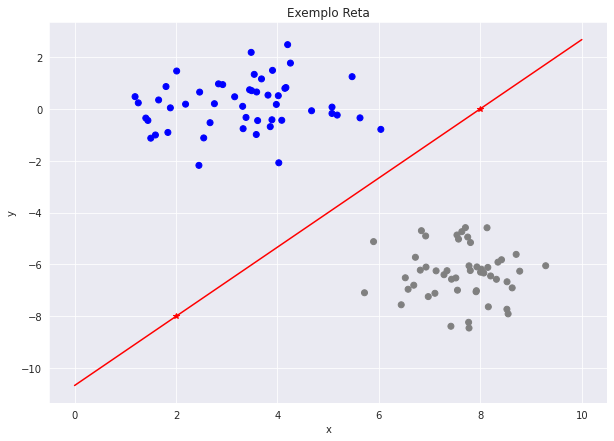

In [ ]:
xex = np.arange(11)
yex = 1.3333 * xex - 10.6667   # y = a * x + b

ax.plot(xex, yex, 'r')

fig

**Obs:** Esta reta não é um método de classificação, trata-se apenas de um exemplo.

### Criando um plano determinado por 3 pontos.

Utilizando como exemplo da página 70 do livro [Cálculo Vetorial e Geometria Analítica](https://cdn.discordapp.com/attachments/755199537752309823/761942955165876234/ApostilaCV.pdf)

São dados os três pontos $P_1 = (−1, 1, −2), P_2 = (1, 2, 1)\text{ e } P_3 = (1, 4, 3)$.

Fixando $P_1$ e calculando as distâncias $\vec{P_1P_2}$ e $\vec{P_1P_3}$ conseguimos encontrar as equações paramétricas em função de **_p_** e **_q_**, para assim encontrar a equação que representa o plano.

$$\vec{P_1P_2}=2+p+3q$$
$$\vec{P_1P_3}=2+3p+5q
$$

Sabendo que a equação cartesiana do plano $\pi$ é determinada pela determinante da matriz das equações paramétricas:
$$[\vec{P_1P}, \vec{P_1P_2}, \vec{P_1P_3}]=0$$

sendo $\vec{P_1P} = (x+1)+(y-1)p+(z+2)q$:

$$
\begin{vmatrix}
\ x+1 & y-1 & z+2 \ \\
\ 2 & 1 & 3 \ \\
\ 2 & 3 & 5 \ \\
  \end{vmatrix} = 0$$

Resultando na seguinte equação do plano: $$x+y-z-2=0$$

Text(0.5, 0, 'z')

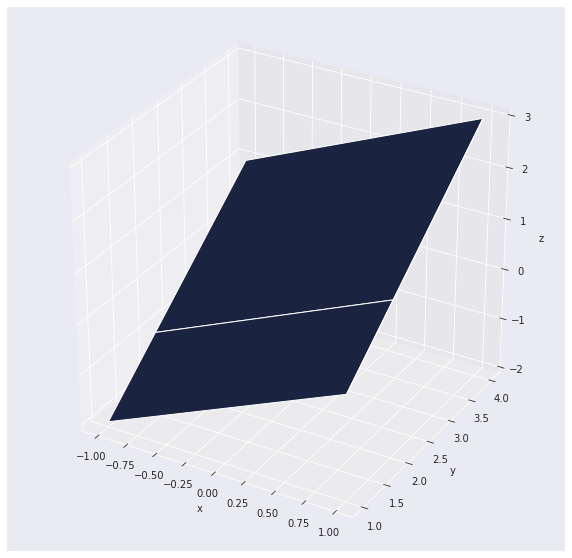

In [ ]:
# Criando a figura e projeção em 3D
fig = plt.figure(figsize = (10, 10)) #altera o tamanho

ax = fig.gca(projection='3d') #define como grafico 3d
x = np.array([-1, 1, 1]) #vetor coeficientes de x
y = np.array([1, 2, 4]) #vetor coeficientes de y
X,Y = np.meshgrid(x,y) #retorna os valores para coordenadas 3d
Z = X + Y - 2 #define o plano

surf = ax.plot_surface(X,Y,Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

Existe uma maneira mais simples de encontrar a equação do plano a partir de 3 pontos, utilizando a biblioteca _Sympy_, podemos declarar o plano inserindo os pontos e depois chamar sua equação.

In [ ]:
from sympy import Plane, Point3D

#P1 = (−1, 1, −2), P2 = (1, 2, 1) e P3 = (1, 4, 3)
plano = Plane(Point3D(-1, 1, -2), Point3D(1, 2, 1), Point3D(1, 4, 3))
plano.equation()


-4*x - 4*y + 4*z + 8

Apesar de ser mais fácil declará-lo dessa maneira, não é possível mostrá-lo graficamente usando matplotlib. Porém, existem várias funções do Sympy em que é possível usá-lo em várias equações para descobrir o vetor normal do plano, se é perpendicular, coplanar, paralelo ou a distância e o ângulo em relação a alguma outra entidade geométrica, entre diversas outras coisas.

Essas informações fogem do escopo desse notebook, mas é possível ver todas essas funções [nesse link](https://docs.sympy.org/latest/modules/geometry/plane.html)

# **Exercícios**

Usando os conceitos aprendidos, vamos resolver alguns exercícios

1 - Em um espaço tridimensional, calcule a distância euclidiana entre a origem e o ponto (5, 2, 4):

In [ ]:
#R:

2 - Agora calcule a distância Manhattan entre esses mesmos dois pontos:

In [ ]:
#R:

3 - Ateste a veracidade do teorema de Pitágoras usando o cálculo de distâncias euclidianas em Numpy:

In [ ]:
#R:

4 - No tópico "Criando uma reta", altere o valor de _random_state_ para outro qualquer e refaça a reta para separar os dois grupos de dados.